In [2]:
import networkx as nx
import custom_funcs as cf
import matplotlib.pyplot as plt
import seaborn
import numpy as np

from collections import Counter

%matplotlib inline
%load_ext autoreload 
%autoreload 2

/Users/ericmjl/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Set Seaborn context
seaborn.set_style('white')
seaborn.set_context('paper')

In [4]:
# Read in the graph and 
G = nx.read_gpickle('20150902_all_ird Final Graph.pkl')
G = cf.impute_reassortant_status(G)
G = cf.impute_weights(G)
G = cf.remove_zero_weighted_edges(G)

In [5]:
len(G.edges())

25683

In [6]:
n_reassortants = sum([1 for n, d in G.nodes(data=True) if d['reassortant'] == True])
n_reassortants

p_reassortants = n_reassortants / len(G.nodes())
p_reassortants

0.11764705882352941

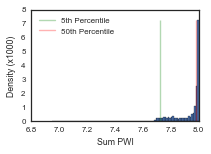

In [11]:
pwis = []
for n, d in G.nodes(data=True):
    in_edges = G.in_edges(n, data=True)
    if in_edges:  # if there are in-edges. 
        pwis.append(in_edges[0][2]['pwi'])
fig = plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)
n, bins, patches = plt.hist(pwis, bins=100)
plt.vlines(np.percentile(pwis, 5), 0, np.max(n), 'green', alpha=0.3, label='5th Percentile')
plt.vlines(np.percentile(pwis, 50), 0, np.max(n), 'red', alpha=0.3, label='50th Percentile')
ax.legend(loc='upper left')
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2),)
plt.xlabel('Sum PWI')
plt.ylabel('Density (x1000)')
ax.set_yticklabels(np.arange(0, 9))
plt.savefig('figures/PWI Histogram.pdf', bbox_inches='tight')